In [1]:
import os
import numpy as np
import pandas


\section{Bellman Equation}

\subsection{Introduction}
The Bellman equation forms the foundation of dynamic programming and is pivotal in the field of reinforcement learning.

The Bellman equation encapsulates the principle of optimality. 
It posits that an optimal policy will ensure that regardless 
of the current state and decision, the subsequent decisions 
will continue to be optimal for the resulting state.

\subsection{Decomposing the Equation}

Let's break down the components of the Bellman equation in the context of reinforcement learning:

\begin{itemize}
    \item \(V(s)\): Represents the value of being in state \(s\). It's essentially the expected cumulative reward starting from state \(s\).
    
    \item \(R(s, a)\): This is the immediate reward when taking action \(a\) in state \(s\).
    
    \item \(P(s' | s, a)\): The probability of transitioning to state \(s'\) from state \(s\) after taking action \(a\).
    
    \item \(\gamma\): This is the discount factor. It down-weights future rewards, indicating our preference for more immediate rewards.
    
    \item \(a\): The action taken in state \(s\).
\end{itemize}

Thus, the equation can be written as:
\[ V(s) = \max_{a} \sum_{s'} P(s' | s, a) [R(s, a) + \gamma V(s')] \]


In [4]:
import numpy as np

# Define the grid world
grid = np.zeros((3, 3))
grid[2, 2] = 1  # terminal state with reward 1

# Parameters
gamma = 0.9  # discount factor
theta = 1e-3  # convergence criterion

# Initialize value function
V = np.zeros_like(grid)

# Possible actions
actions = ["UP", "DOWN", "LEFT", "RIGHT"]

def next_state(s, a):
    if a == "UP":
        return max(s[0] - 1, 0), s[1]
    if a == "DOWN":
        return min(s[0] + 1, 2), s[1]
    if a == "LEFT":
        return s[0], max(s[1] - 1, 0)
    if a == "RIGHT":
        return s[0], min(s[1] + 1, 2)

while True:
    print(V)
    print('***************************')
    delta = 0
    for i in range(3):
        for j in range(3):
            v = V[i, j]
            values = []
            for a in actions:
                (next_i, next_j) = next_state((i, j), a)
                reward = grid[next_i, next_j]
                values.append(reward + gamma * V[next_i, next_j])
            V[i, j] = max(values)  # Bellman update
            delta = max(delta, abs(v - V[i, j]))
    if delta < theta:
        break

print(V)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
***************************
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 1.]]
***************************
[[0.  0.  0.9]
 [0.  0.9 1.9]
 [0.9 1.9 1.9]]
***************************
[[0.   0.81 1.71]
 [0.81 1.71 2.71]
 [1.71 2.71 2.71]]
***************************
[[0.729 1.539 2.439]
 [1.539 2.439 3.439]
 [2.439 3.439 3.439]]
***************************
[[1.3851 2.1951 3.0951]
 [2.1951 3.0951 4.0951]
 [3.0951 4.0951 4.0951]]
***************************
[[1.97559 2.78559 3.68559]
 [2.78559 3.68559 4.68559]
 [3.68559 4.68559 4.68559]]
***************************
[[2.507031 3.317031 4.217031]
 [3.317031 4.217031 5.217031]
 [4.217031 5.217031 5.217031]]
***************************
[[2.9853279 3.7953279 4.6953279]
 [3.7953279 4.6953279 5.6953279]
 [4.6953279 5.6953279 5.6953279]]
***************************
[[3.41579511 4.22579511 5.12579511]
 [4.22579511 5.12579511 6.12579511]
 [5.12579511 6.12579511 6.12579511]]
***************************
[[3.8032156 4.6132156 5.51

This code implements value iteration to find the optimal value function for a simple 3x3 grid world reinforcement learning problem.

Here is what it is doing step-by-step:

- Imports numpy as np for numerical operations 

- Defines a 3x3 grid with rewards. Grid cell (2,2) has a reward of 1.

- Sets gamma as the discount factor and theta as the convergence criterion. 

- Initializes the value function V to zeros.

- Defines a list of possible actions.

- Defines a next_state function to get the next grid position based on current position and action.

- Enters a loop that continues until convergence:

  - Iterates through each grid cell

  - For each cell, gets the current value v

  - Tries each action to calculate the Bellman update

    - Calls next_state to get next grid position

    - Gets reward from that next position

    - Gets discounted value of next position

    - Appends to list of values

  - Updates value of current cell to max of values list (Bellman update)

  - Calculates delta between new and old value

  - Checks if delta < theta for convergence

- Prints the final optimal value function V.

So in summary, it is using value iteration to iteratively calculate the optimal value function for each state until convergence, based on the Bellman equation.

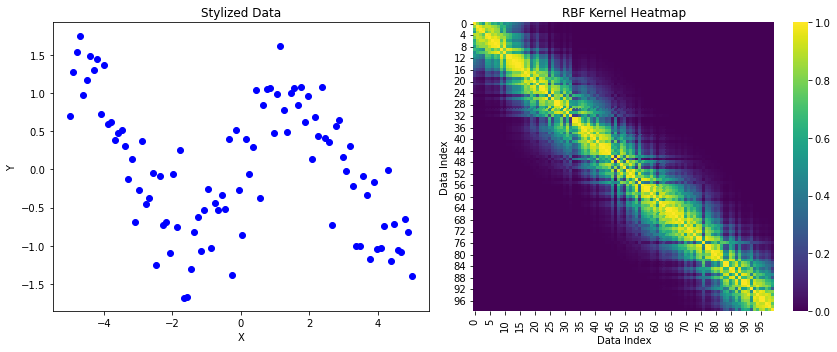

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate stylized data: A range of points in 2D space
X = np.linspace(-5, 5, 100)
Y = np.sin(X) + 0.5 * np.random.randn(100)

# Define the RBF kernel function
def rbf_kernel(x1, x2, sigma=1.0):
    distance = np.linalg.norm(np.array(x1) - np.array(x2))
    return np.exp(-distance**2 / (2 * sigma**2))

# Compute the kernel matrix
K = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        K[i, j] = rbf_kernel([X[i], Y[i]], [X[j], Y[j]])

# Plot the dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, color='blue')
plt.title("Stylized Data")
plt.xlabel("X")
plt.ylabel("Y")

# Plot the heatmap of kernel values
plt.subplot(1, 2, 2)
sns.heatmap(K, cmap='viridis')
plt.title("RBF Kernel Heatmap")
plt.xlabel("Data Index")
plt.ylabel("Data Index")

plt.tight_layout()
plt.show()
